## FMCG
## Cluster the countries based on various sales data

In [1]:
## Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/FMCG_Sales.csv")

In [3]:
df

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387


In [4]:
df.columns

Index(['Sales of Wheat in tons', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007'],
      dtype='object')

In [5]:
df.rename(columns={"Sales of Wheat in tons":"country"},inplace=True)

In [6]:
df.isnull().sum()

country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
dtype: int64

### There are no null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  207 non-null    object
 1   1990     207 non-null    object
 2   1991     207 non-null    object
 3   1992     207 non-null    object
 4   1993     207 non-null    object
 5   1994     207 non-null    object
 6   1995     207 non-null    object
 7   1996     207 non-null    int64 
 8   1997     207 non-null    int64 
 9   1998     207 non-null    int64 
 10  1999     207 non-null    int64 
 11  2000     207 non-null    int64 
 12  2001     207 non-null    int64 
 13  2002     207 non-null    int64 
 14  2003     207 non-null    int64 
 15  2004     207 non-null    object
 16  2005     207 non-null    object
 17  2006     207 non-null    object
 18  2007     207 non-null    object
dtypes: int64(8), object(11)
memory usage: 30.9+ KB


### There are lot of columns which are not numeric. Converting them to int64

In [8]:
df["1990"] = df["1990"].str.replace(",", "").astype("int64")
df["1991"] = df["1991"].str.replace(",", "").astype("int64")
df["1992"] = df["1992"].str.replace(",", "").astype("int64")
df["1993"] = df["1993"].str.replace(",", "").astype("int64")
df["1994"] = df["1994"].str.replace(",", "").astype("int64")
df["1995"] = df["1995"].str.replace(",", "").astype("int64")
df["2004"] = df["2004"].str.replace(",", "").astype("int64")
df["2005"] = df["2005"].str.replace(",", "").astype("int64")
df["2006"] = df["2006"].str.replace(",", "").astype("int64")
df["2007"] = df["2007"].str.replace(",", "").astype("int64")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  207 non-null    object
 1   1990     207 non-null    int64 
 2   1991     207 non-null    int64 
 3   1992     207 non-null    int64 
 4   1993     207 non-null    int64 
 5   1994     207 non-null    int64 
 6   1995     207 non-null    int64 
 7   1996     207 non-null    int64 
 8   1997     207 non-null    int64 
 9   1998     207 non-null    int64 
 10  1999     207 non-null    int64 
 11  2000     207 non-null    int64 
 12  2001     207 non-null    int64 
 13  2002     207 non-null    int64 
 14  2003     207 non-null    int64 
 15  2004     207 non-null    int64 
 16  2005     207 non-null    int64 
 17  2006     207 non-null    int64 
 18  2007     207 non-null    int64 
dtypes: int64(18), object(1)
memory usage: 30.9+ KB


In [10]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


In [11]:
## All columns required for clustring
cols = df.columns.to_list()
cols.remove('country')
print(cols)

['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007']


In [12]:
## Creating copy of data
df_data = df.copy(deep=True)

### Applying Standardization

In [13]:
## Apply Standardization before applying PCA transformation
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(df[cols])
df[cols] = scaler.transform(df[cols])

### Applying PCA dimensionality reduction method

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
## Fitting the tranining data
pca.fit(df[cols])
df_pca = pca.transform(df[cols])

In [17]:
print(pca.components_)

[[ 0.22948763  0.2316062   0.23330821  0.23490135  0.23554523  0.23735859
   0.23820185  0.23917958  0.24072682  0.23922777  0.24106563  0.23960339
   0.23617826  0.23571399  0.23439145  0.23323102  0.23255869  0.22989643]
 [ 0.32311656  0.30488748  0.29122315  0.27490143  0.24780487  0.22483082
   0.1506566   0.09858712  0.03586626 -0.04666297 -0.09505813 -0.16306923
  -0.20077542 -0.26471593 -0.27718023 -0.29501659 -0.29382614 -0.31338541]]


In [18]:
print(pca.explained_variance_)

[16.6475819  1.0318674]


In [19]:
print(f"Explained variation per principal component: {pca.explained_variance_ratio_}")

Explained variation per principal component: [0.92039771 0.05704903]


In [20]:
## Converting the output of PCA to dataframe
df_final = pd.DataFrame(df_pca)

In [21]:
df_final.rename(columns={0:'PCA1',1:'PCA2'}, inplace = True)

In [22]:
df_final.columns

Index(['PCA1', 'PCA2'], dtype='object')

In [23]:
df_final.head()

,PCA1,PCA2
0,3.498735,0.975856
1,-2.936103,0.012171
2,-2.725665,-0.185039
3,-3.445596,0.005623
4,-3.181315,0.033922


### Applying KMeans clustring

In [24]:
from sklearn.cluster import KMeans

In [25]:
### Building Elbow chart to find the optimum number of KMeans cluster
## Running Model on multiple clusters to determine inertia of the model
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters, random_state=48)
    kmeans.fit(df_final)
    inertia_list.append(kmeans.inertia_)
print(inertia_list)

[3641.966555746663, 927.1243171671325, 551.9567912653969, 429.34823120698013, 333.133759322179, 257.4572829200372, 212.00977417871718, 175.01422492237907, 140.9090167160771, 124.90754616981515, 105.26732087828269, 96.5220958419066, 84.60064819112183, 77.09091792483584, 72.24766600699651, 65.29502388569071, 59.52779417932733, 53.678010152825216, 49.60151445598171, 44.64260541971415]


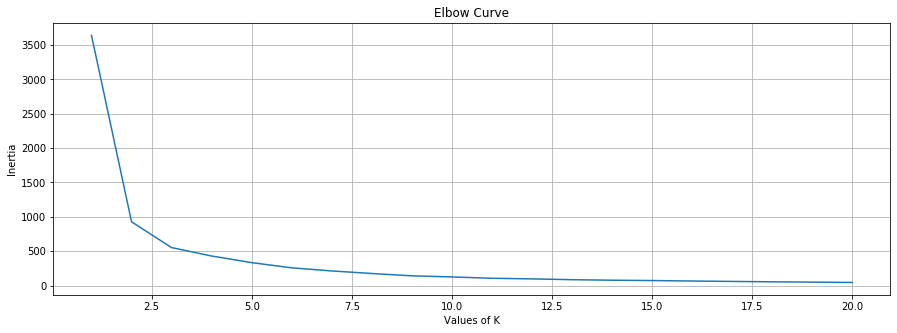

In [26]:
#Plotting the Elbow Curve
plt.figure(figsize=(15, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

### number of cluster = 4 as per Elbow plot after which the values are not changing significantly

## So builing K-Means clustering with K=4 which can be used for prediction
### Performing clustring based on PCA

In [27]:
kmeans = KMeans(n_clusters=4, random_state=48)
kmeans.fit(df_final)

KMeans(n_clusters=4, random_state=48)

In [28]:
labels = kmeans.predict(df_final)
labels[:50]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1,
       3, 2, 1, 0, 1, 1, 1, 1, 0, 0, 3, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
centroids = kmeans.cluster_centers_
centroids

array([[ 4.30523743, -0.55796868],
       [-2.83522268,  0.03198887],
       [ 0.02450573,  0.34471654],
       [ 9.47222647,  0.6368249 ]])

In [30]:
kmeans.inertia_

429.34823120698013

In [31]:
label_count={}
for i in labels:
    if i in label_count:
        label_count[i] += 1
    else:
        label_count[i] = 1

label_count

{0: 43, 1: 119, 3: 16, 2: 29}

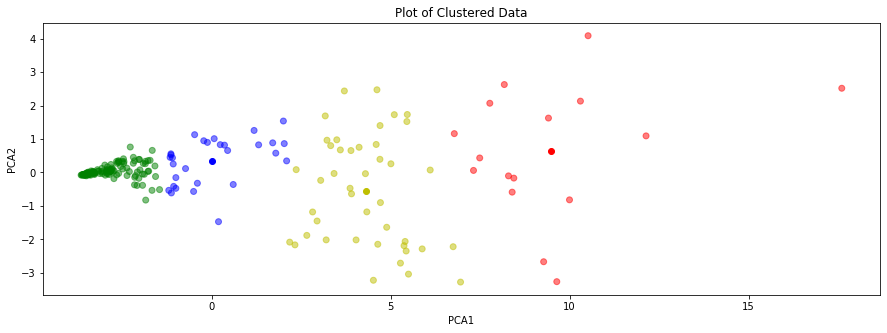

In [32]:
plt.figure(figsize=(15, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df_final['PCA1'], df_final['PCA2'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Plot of Clustered Data')
plt.show()

## Performing Agglomerative Hirerchial Clustering for k = 4
### Performing clustering based on years of data

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
ag = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [35]:
ag_pred = ag.fit_predict(df_data[cols])

In [36]:
pd.Series(ag.labels_).value_counts()

0    141
2     49
1     16
3      1
dtype: int64

## Adding the final output of KMeans and Agglomerative Clustring to data for analysis

In [37]:
df_data["kmeans"] = pd.DataFrame(labels)

In [38]:
df_data["agglo"] = pd.DataFrame(ag_pred)

In [39]:
df_data

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,kmeans,agglo
0,Afghanistan,436,429,422,415,407,397,397,387,374,...,346,326,304,308,283,267,251,238,0,2
1,Albania,42,40,41,42,42,43,42,44,43,...,40,34,32,32,29,29,26,22,1,0
2,Algeria,45,44,44,43,43,42,43,44,45,...,48,49,50,51,52,53,55,56,1,0
3,American Samoa,42,14,4,18,17,22,0,25,12,...,8,6,5,6,9,11,9,5,1,0
4,Andorra,39,37,35,33,32,30,28,23,24,...,20,20,21,18,19,18,17,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,...,103,13,275,147,63,57,60,25,2,0
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,...,40,39,37,36,35,33,32,31,1,0
204,Yemen,265,261,263,253,250,244,233,207,194,...,164,154,149,146,138,137,135,130,2,0
205,Zambia,436,456,494,526,556,585,602,626,634,...,658,680,517,478,468,453,422,387,3,1


### Consistent but low importes

In [41]:
df_data[df_data["agglo"] == 0].loc[:10]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,kmeans,agglo
1,Albania,42,40,41,42,42,43,42,44,43,...,40,34,32,32,29,29,26,22,1,0
2,Algeria,45,44,44,43,43,42,43,44,45,...,48,49,50,51,52,53,55,56,1,0
3,American Samoa,42,14,4,18,17,22,0,25,12,...,8,6,5,6,9,11,9,5,1,0
4,Andorra,39,37,35,33,32,30,28,23,24,...,20,20,21,18,19,18,17,19,1,0
6,Anguilla,38,38,37,37,36,35,35,36,36,...,35,35,35,35,35,34,34,34,1,0
7,Antigua and Barbuda,16,15,15,14,13,12,12,11,11,...,8,9,7,9,8,8,9,9,1,0
8,Argentina,96,91,86,82,78,74,71,67,63,...,52,51,42,41,39,39,37,35,1,0
9,Armenia,52,49,51,55,60,68,74,75,74,...,94,99,97,91,85,79,79,81,1,0
10,Australia,7,7,7,7,7,7,7,7,6,...,6,6,6,6,6,6,6,6,1,0


### Countries whose imports are consitently decreasing

In [44]:
df_data[df_data["agglo"] == 1].loc[:100]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,kmeans,agglo
15,Bangladesh,639,623,608,594,579,576,550,535,516,...,500,491,478,458,444,416,392,387,3,1
22,Bhutan,924,862,804,750,699,651,620,597,551,...,515,512,472,460,443,412,406,363,3,1
32,Cambodia,928,905,881,858,836,811,810,789,777,...,758,750,728,712,696,676,672,664,3,1
51,"Korea, Dem. Rep.",841,828,815,802,788,775,775,775,775,...,713,650,577,527,499,508,500,441,3,1
96,Kiribati,1026,1006,986,966,947,928,910,853,571,...,546,607,587,477,439,419,405,423,3,1


### Countries whose imports are consitently increasing

In [60]:
df_data[df_data["agglo"] == 2].loc[25:40]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,kmeans,agglo
25,Botswana,344,355,351,349,347,349,336,349,371,...,445,497,535,586,598,599,621,622,0,2
30,Burkina Faso,179,196,208,221,233,246,251,271,286,...,338,368,398,419,426,421,411,403,0,2
31,Burundi,288,302,292,293,305,322,339,346,424,...,455,522,581,619,639,654,657,647,0,2
35,Cape Verde,449,438,428,418,408,398,394,391,387,...,380,283,374,370,367,278,285,280,0,2
37,Central African Republic,318,336,342,350,356,365,270,395,419,...,485,495,468,566,574,507,437,425,0,2
38,Chad,251,272,282,294,304,315,354,408,433,...,420,450,502,573,548,518,505,497,0,2
40,China,327,321,315,309,303,303,290,283,276,...,269,265,259,241,220,206,200,194,2,2


### Highest Importer

In [59]:
df_data[df_data["agglo"] == 3].loc[:60]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,kmeans,agglo
54,Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,...,761,775,932,960,1034,1046,1093,1104,3,3
